# 5. (Otro Generador Pseudoaleatorio)

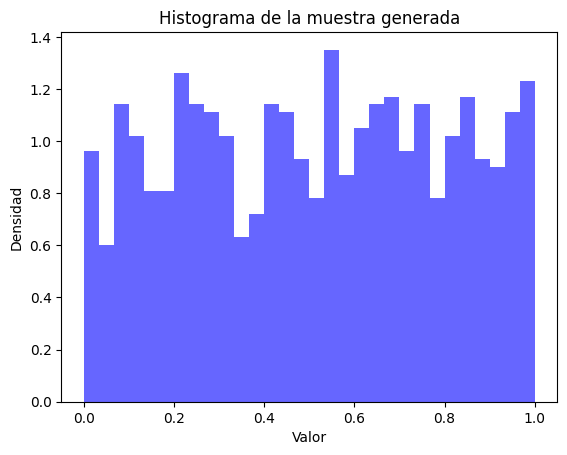

Estadístico KS: 0.0288639653837498
Valor p: 0.3683725055008005
Semilla: 10 - Estadístico KS: 0.027497704520105637, Valor p: 0.4284805822305251
Semilla: 100 - Estadístico KS: 0.02431387561307785, Valor p: 0.5868379257351808
Semilla: 500 - Estadístico KS: 0.021588933434158436, Valor p: 0.7312944440033997
Estadístico KS GLC: 0.027695887019857757, Valor p: 0.41942567899007543


In [1]:
import random
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Establecer semilla para garantizar la reproducibilidad
random.seed(42)

# Generar una muestra de números pseudoaleatorios en el intervalo [0, 1)
N = 1000  # tamaño de la muestra
sample = [random.uniform(0, 1) for _ in range(N)]

# Graficar el histograma de la muestra generada
plt.hist(sample, bins=30, density=True, alpha=0.6, color='b')
plt.title('Histograma de la muestra generada')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.show()

# Prueba de Kolmogorov-Smirnov para verificar uniformidad
ks_stat, p_value = stats.kstest(sample, 'uniform')

print(f'Estadístico KS: {ks_stat}')
print(f'Valor p: {p_value}')

# Realizar experimentos con diferentes semillas
for seed in [10, 100, 500]:
    random.seed(seed)
    sample = [random.uniform(0, 1) for _ in range(N)]
    ks_stat, p_value = stats.kstest(sample, 'uniform')
    print(f'Semilla: {seed} - Estadístico KS: {ks_stat}, Valor p: {p_value}')

# Implementación del Generador Lineal Congruencial (GLC)
def glc(semilla, a, c, m, tamaño):
    numeros = []
    x = semilla
    for _ in range(tamaño):
        x = (a * x + c) % m
        numeros.append(x / m)
    return numeros

# Parámetros del GLC
semilla = 42
a = 1664525
c = 1013904223
m = 2**32
glc_sample = glc(semilla, a, c, m, N)

# Prueba de Kolmogorov-Smirnov para evaluar la uniformidad de la muestra generada por el GLC
ks_stat_glc, p_value_glc = stats.kstest(glc_sample, 'uniform')
print(f'Estadístico KS GLC: {ks_stat_glc}, Valor p: {p_value_glc}')


El Mersenne Twister es generalmente considerado superior al GLC para aplicaciones que requieren números pseudoaleatorios de alta calidad debido a su periodo extremadamente largo y menor susceptibilidad a patrones repetitivos. En este experimento, ambos generadores produjeron secuencias aceptables según la prueba de Kolmogorov-Smirnov, pero el Mersenne Twister suele ser preferido para simulaciones y modelado debido a su mejor rendimiento en aplicaciones estadísticas y en la calidad de aleatoriedad de largo plazo.